In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import json

### load sample data from api call

In [3]:
sample = '../sample_data/bikes.json'

In [4]:
with open(sample, 'r') as f:
    data = json.load(f)

In [5]:
data.keys()

dict_keys(['countries'])

In [6]:
data_leipzig = data['countries'][0]['cities'][0]

In [7]:
bike_data = data_leipzig['places']
print(len(bike_data))

1215


### get only single bikes not stations

In [38]:
bikes = [b for b in bike_data if b['bike'] == False]
print(len(bikes))

71


In [56]:
bikes[50]

{'uid': 70074365,
 'lat': 51.337362,
 'lng': 12.334068,
 'bike': False,
 'name': 'Lindenauer Markt',
 'address': '04177',
 'spot': True,
 'number': 4047,
 'booked_bikes': 0,
 'bikes': 2,
 'bikes_available_to_rent': 2,
 'bike_racks': 0,
 'free_racks': 0,
 'special_racks': 0,
 'free_special_racks': 0,
 'maintenance': False,
 'terminal_type': 'free',
 'bike_list': [{'number': '39128',
   'bike_type': 71,
   'lock_types': ['frame_lock'],
   'active': True,
   'state': 'ok',
   'electric_lock': True,
   'boardcomputer': 7551080635,
   'pedelec_battery': None,
   'battery_pack': None},
  {'number': '21809',
   'bike_type': 196,
   'lock_types': ['frame_lock'],
   'active': True,
   'state': 'ok',
   'electric_lock': True,
   'boardcomputer': 7551108774,
   'pedelec_battery': None,
   'battery_pack': None}],
 'bike_numbers': ['39128', '21809'],
 'bike_types': {'71': 1, '196': 1},
 'place_type': '17',
 'rack_locks': False}

In [8]:
bikes = [b for b in bike_data if b['bike'] == True]
print(len(bikes))

1144


In [9]:
print(bikes[50])

{'uid': 91486739, 'lat': 51.34952, 'lng': 12.376992, 'bike': True, 'name': 'BIKE 23190', 'address': None, 'spot': False, 'number': 0, 'booked_bikes': 0, 'bikes': 1, 'bikes_available_to_rent': 1, 'bike_racks': 0, 'free_racks': 0, 'special_racks': 0, 'free_special_racks': 0, 'maintenance': False, 'terminal_type': '', 'bike_list': [{'number': '23190', 'bike_type': 196, 'lock_types': ['frame_lock'], 'active': True, 'state': 'ok', 'electric_lock': True, 'boardcomputer': 7551110126, 'pedelec_battery': None, 'battery_pack': None}], 'bike_numbers': ['23190'], 'bike_types': {'196': 1}, 'place_type': '12', 'rack_locks': False}


In [10]:
list(bikes[0].keys())

['uid',
 'lat',
 'lng',
 'bike',
 'name',
 'address',
 'spot',
 'number',
 'booked_bikes',
 'bikes',
 'bikes_available_to_rent',
 'bike_racks',
 'free_racks',
 'special_racks',
 'free_special_racks',
 'maintenance',
 'terminal_type',
 'bike_list',
 'bike_numbers',
 'bike_types',
 'place_type',
 'rack_locks']

### get only free bikes

In [11]:
free_bikes = [b for b in bikes if b['bikes_available_to_rent'] == 1]
print(len(free_bikes))

1142


### get location of bikes

In [12]:
locations = [{'id': b['uid'], 'longitude': b['lng'], 'latitude': b['lat'] } for b in free_bikes]

In [13]:
locations_df = pd.DataFrame(locations)

In [14]:
locations_df.head(5)

,id,longitude,latitude
0,87478389,12.336460,51.369716
1,88054003,12.410872,51.334409
2,89011807,12.383891,51.371316
3,89354082,12.378630,51.384498
4,89364697,12.370363,51.375391


## plot bikes on map
following this tutorial: https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

### get bounding box

In [15]:
b_box = {
    'latitude': (locations_df.latitude.min(), locations_df.latitude.max()),
    'longitude': (locations_df.longitude.min(), locations_df.longitude.max()) 
    }

In [16]:
b_box

{'latitude': (51.26136, 51.447924), 'longitude': (12.240951, 12.594167)}

### load map
from https://www.openstreetmap.org/export#map=5/51.500/-0.100

In [28]:
map_leipzig = plt.imread('./map_leipzig.png')

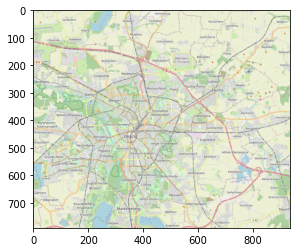

In [29]:
plt.imshow(map_leipzig)

### plot bikes on map

(12.240951, 12.594167, 51.26136, 51.447924)

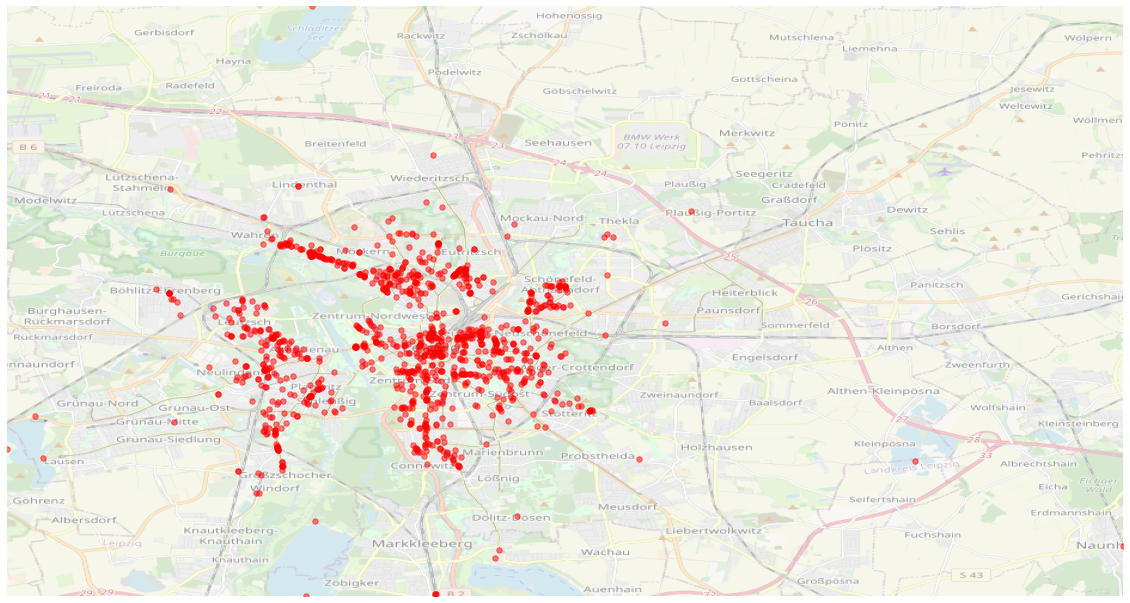

In [37]:
fig, ax = plt.subplots(figsize = (20,20))

# add bikes as points
ax.scatter(locations_df.longitude, locations_df.latitude, zorder=1, alpha= 0.5, c='r', s=30)
ax.set_ylim(b_box['latitude'][0], b_box['latitude'][1])
ax.set_xlim(b_box['longitude'][0], b_box['longitude'][1])

# show map
ax.imshow(
    map_leipzig, 
    alpha=0.5,
    zorder=0, 
    extent=(*b_box['longitude'], *b_box['latitude']), 
    aspect='equal'
)

# disable x labels
ax.axis('off')

### Debug locations

In [20]:
northest_bike = min(locations, key=lambda x: x['longitude'])

In [21]:
northest_bike

{'id': 92633695, 'longitude': 12.240951, 'latitude': 51.30768}

In [22]:
northest_bike_loc = [northest_bike['latitude'], northest_bike['longitude']]
northest_bike_loc

[51.30768, 12.240951]